# In this project, you will learn practically how to choose the best features that affect The chance of graduate admission using Data analysis & data visualization  and then using these features in  multi linear regression model.

We will go through 4 tasks to implement our project:

              Task 1: Importing libraries and Exploring the Dataset.
              Task 2: Checking missing values and enhance the data for analysis.
              Task 3: Creating visual methods to analyze the data.
              Task 4: make linear regression mode

## Task 1: Importing libraries and exploring dataset

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
from sklearn import metrics
import copy

In [2]:
# Imoprting dataset and viewing the first 5 rows
student_df=pd.read_csv("Admission_Predict.csv")
student_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Basic info on the data
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The data consists of 500 entries of total 9 columns:
    4 float type, 5 integar type
    No missing data

## Step 2: Checking missing values and enhance the data for analysis.

In [5]:
# A brief summary on the dataset
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


There is no skeweness in the data

In [7]:
# Checking missing values
student_df.isna().apply(pd.value_counts)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
False,500,500,500,500,500,500,500,500,500


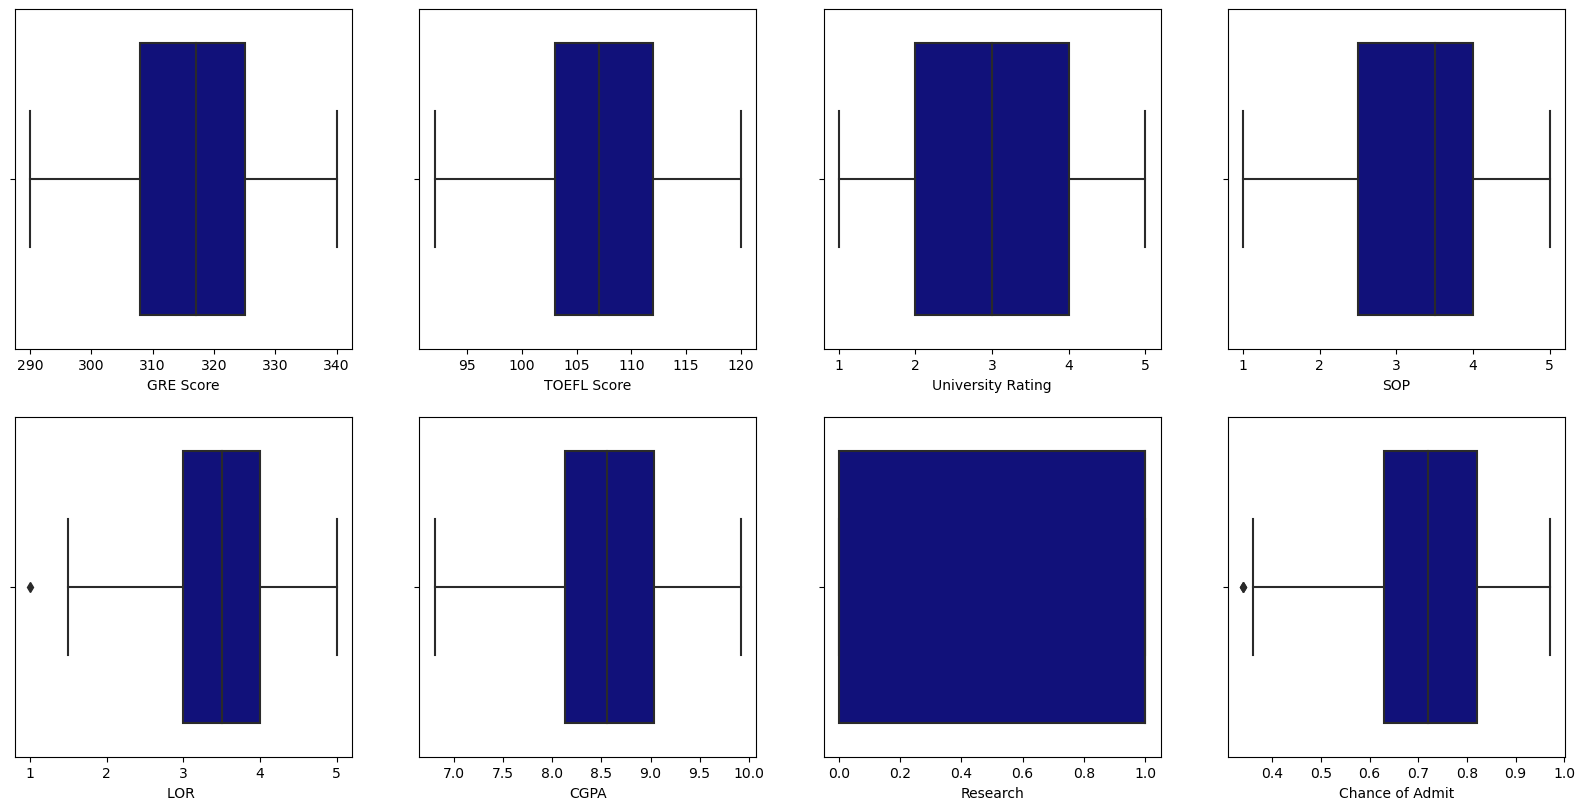

In [16]:
# Checking outliers from boxplot
plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
sns.boxplot(data=student_df,x='GRE Score',color='darkblue')

plt.subplot(3,4,2)
sns.boxplot(data=student_df,x='TOEFL Score', color='darkblue')

plt.subplot(3,4,3)
sns.boxplot(data=student_df,x='University Rating', color='darkblue')

plt.subplot(3,4,4)
sns.boxplot(x=student_df.SOP, color='darkblue')

plt.subplot(3,4,5)
sns.boxplot(data=student_df,x='LOR ', color='darkblue')

plt.subplot(3,4,6)
sns.boxplot(x=student_df.CGPA, color='darkblue')

plt.subplot(3,4,7)
sns.boxplot(x=student_df.Research, color='darkblue')

plt.subplot(3,4,8)
sns.boxplot(data=student_df,x='Chance of Admit', color='darkblue')

plt.show()

No outliers

## Step 3: creating visual methods to analyze the data

In [17]:
student_df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

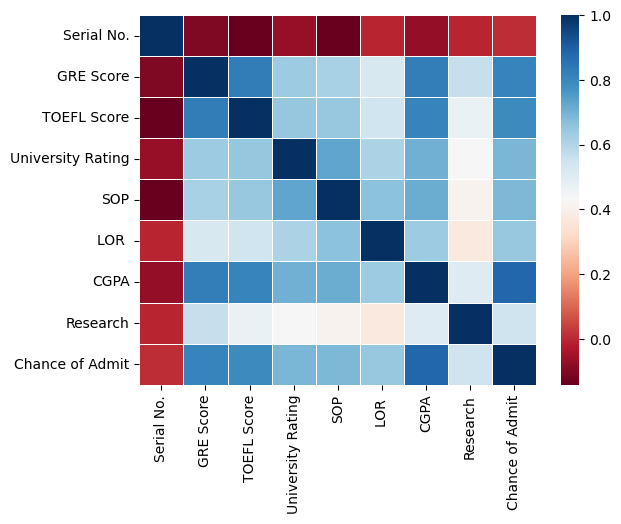

In [23]:
sns.heatmap(data=student_df.corr(),cmap='RdBu',linecolor='white',linewidths=0.5)

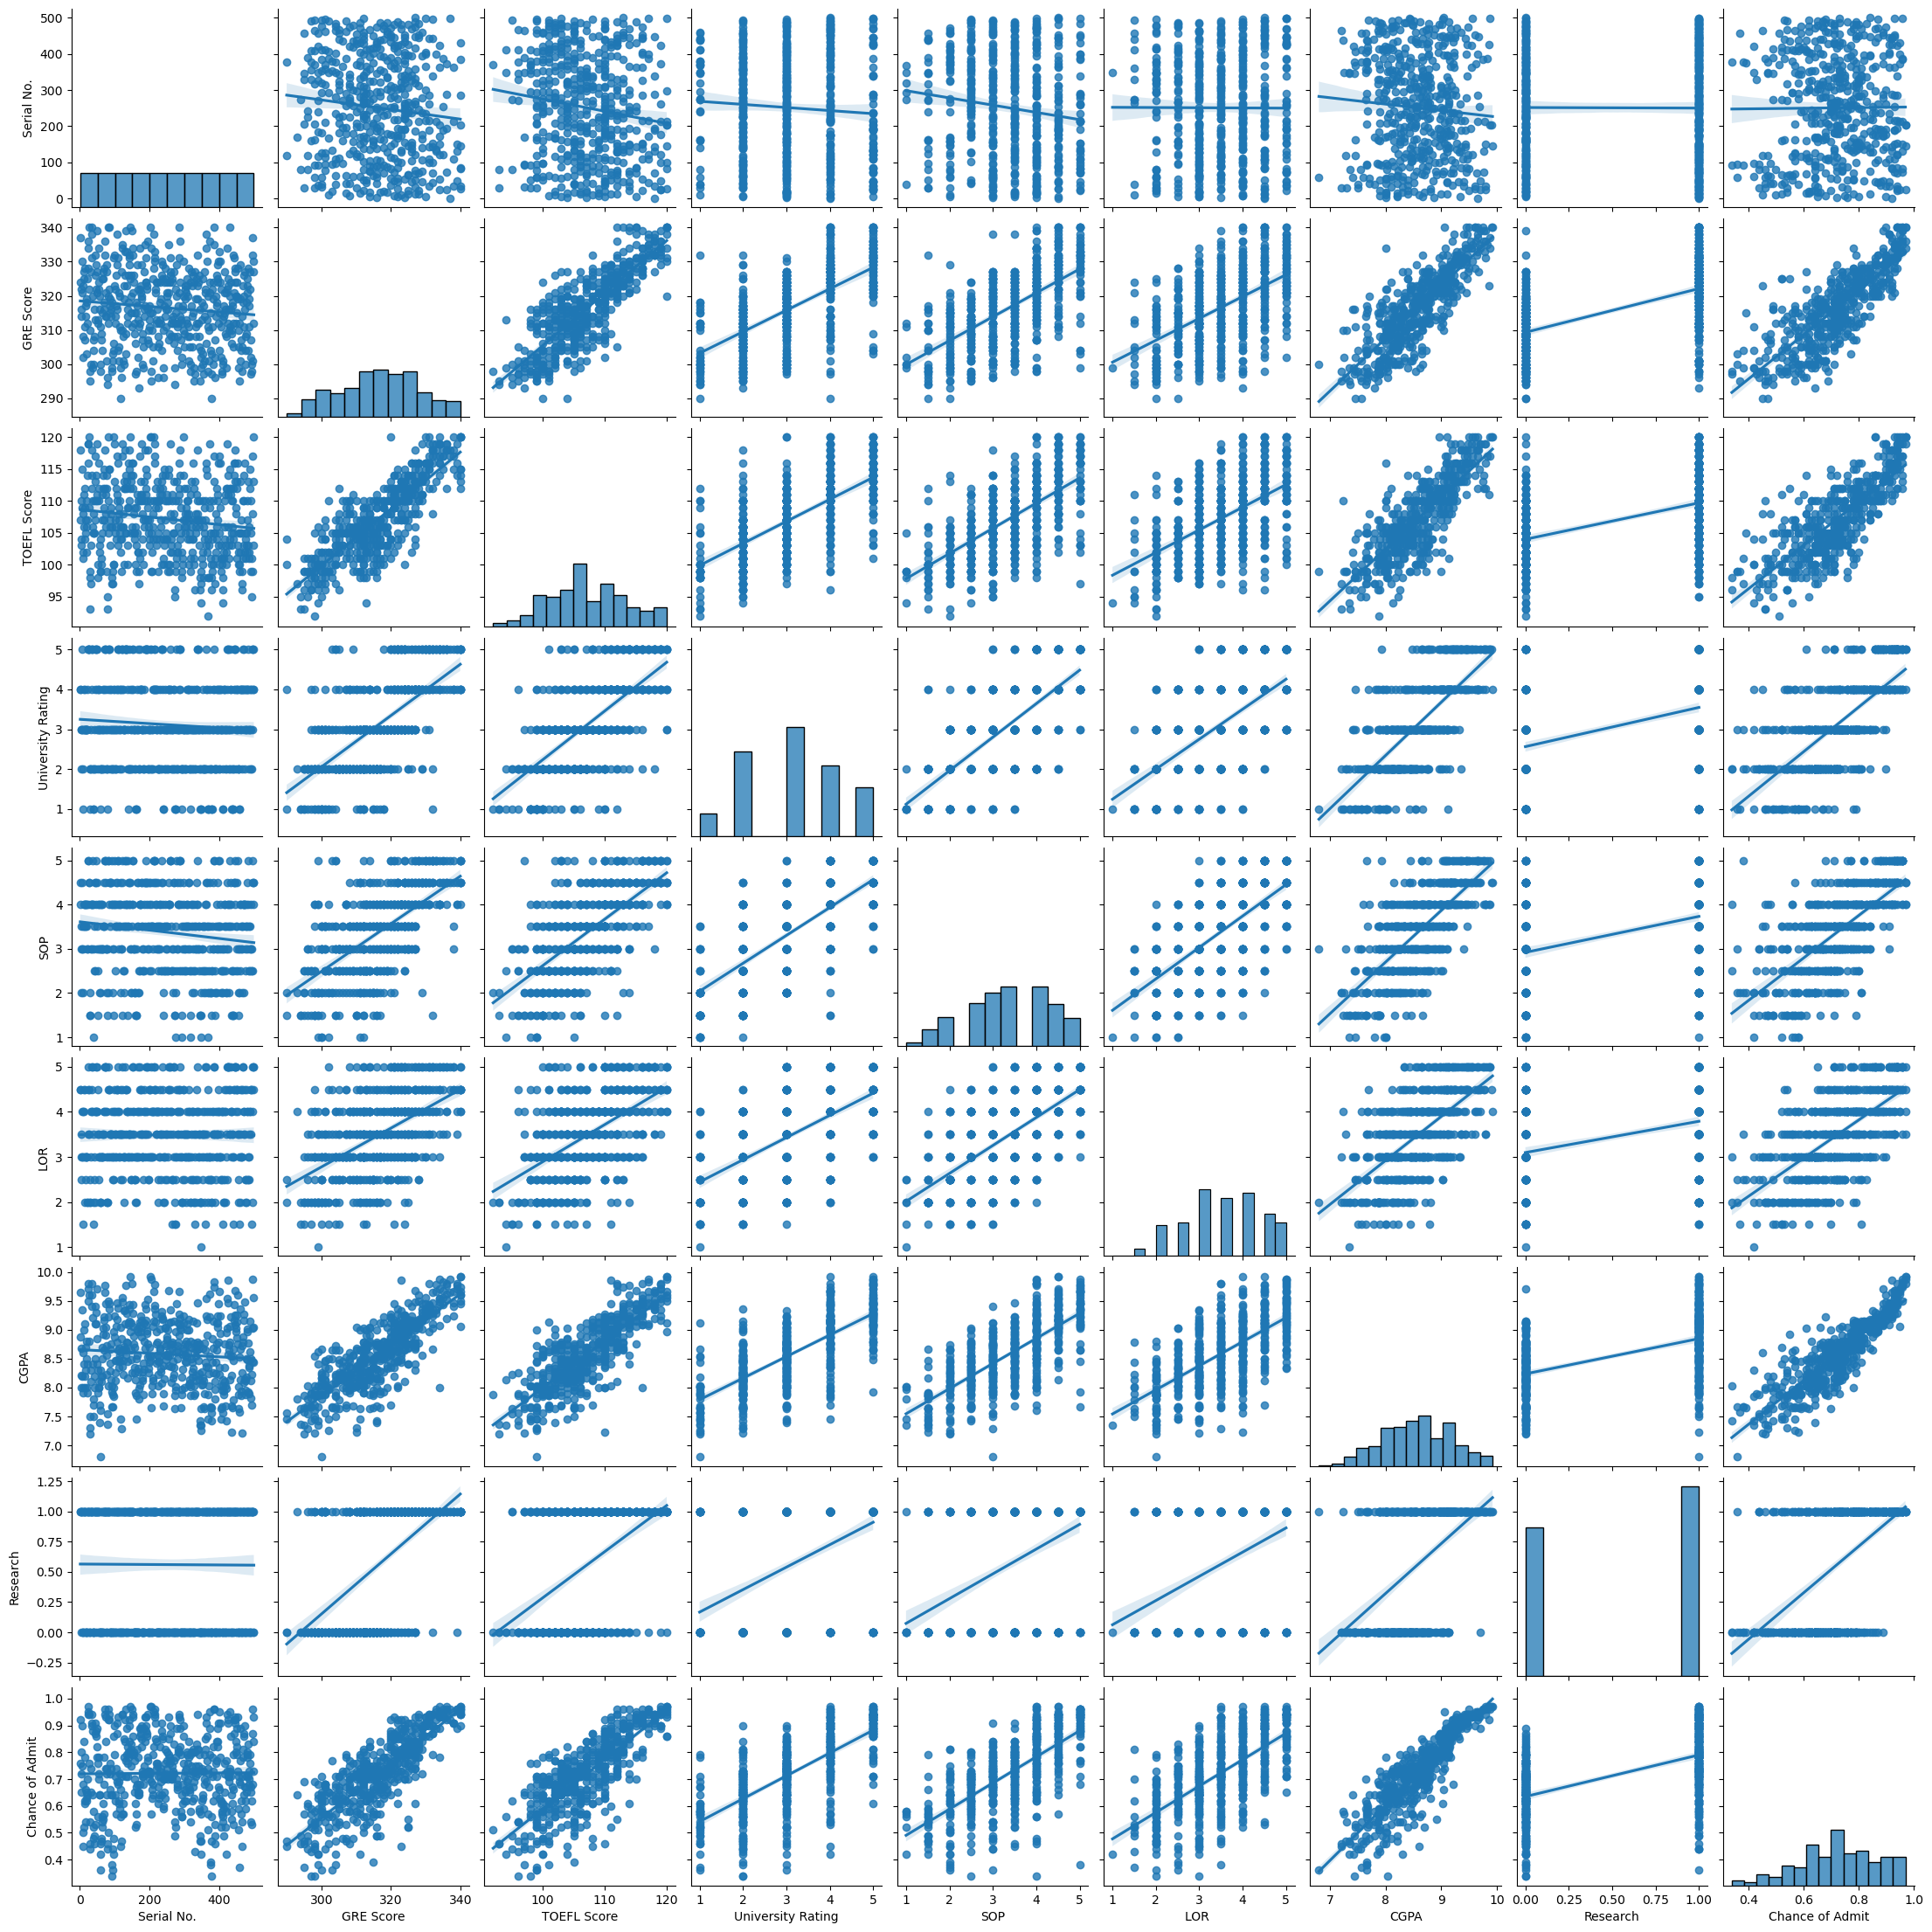

In [22]:
sns.pairplot(data=student_df,kind="reg",diag_kind="hist",palette="darkblue")

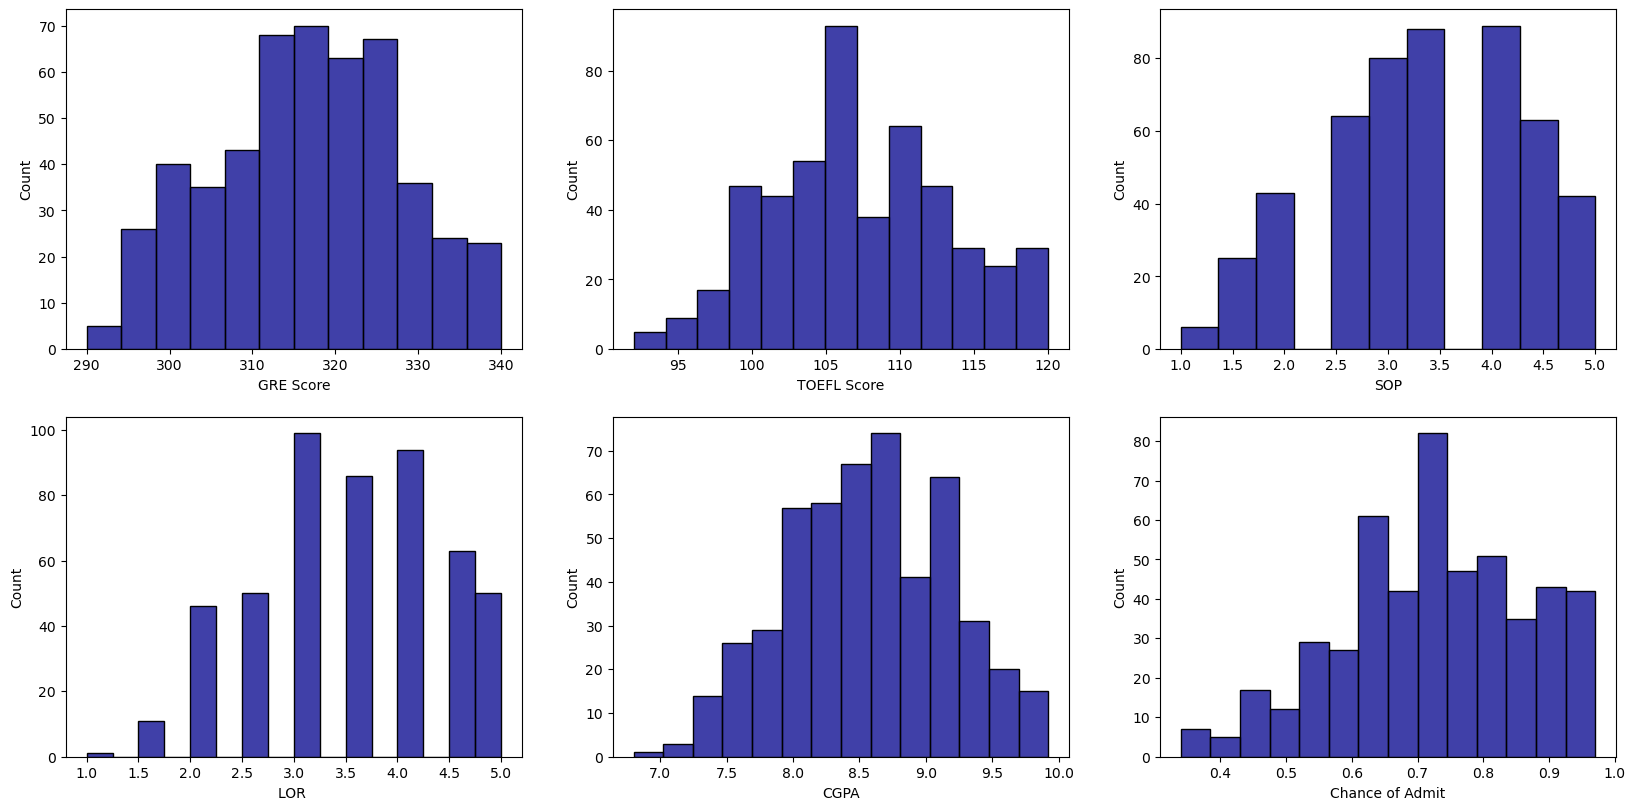

In [36]:
# Checking distribution of data
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.histplot(student_df['GRE Score'],color='darkblue')

plt.subplot(3,3,2)
sns.histplot(student_df['TOEFL Score'], color='darkblue')

plt.subplot(3,3,3)
sns.histplot(x=student_df.SOP, color='darkblue')

plt.subplot(3,3,4)
sns.histplot(data=student_df,x='LOR ', color='darkblue')

plt.subplot(3,3,5)
sns.histplot(x=student_df.CGPA, color='darkblue')

plt.subplot(3,3,6)
sns.histplot(data=student_df,x='Chance of Admit', color='darkblue')

plt.show()

i have strong correlation nearly with all the variables and to visualize the categorial features 

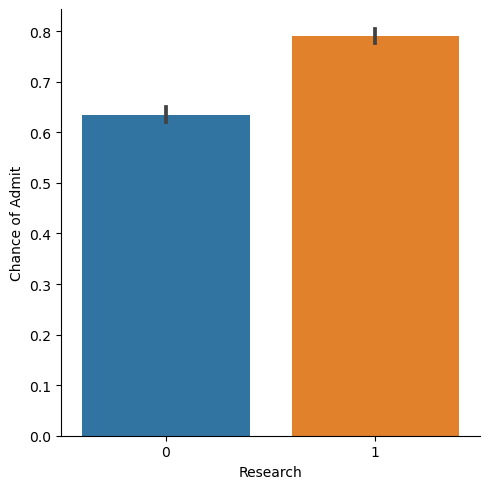

In [26]:
sns.catplot(x='Research',y='Chance of Admit',data=student_df,kind='bar')

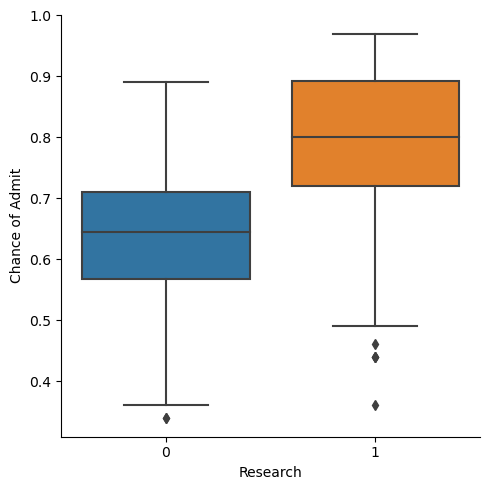

In [28]:
sns.catplot(x='Research',y='Chance of Admit',data=student_df,kind='box')

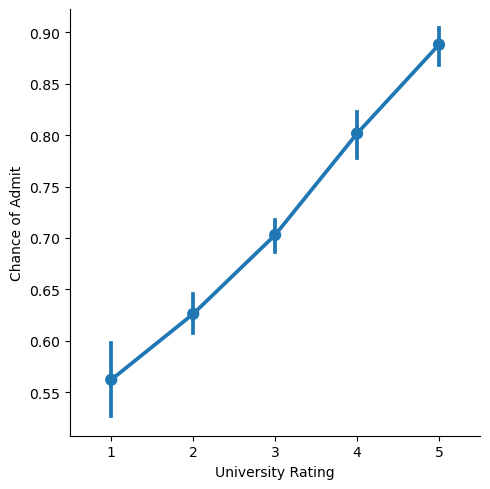

In [27]:
sns.catplot(x='University Rating',y='Chance of Admit',data=student_df,kind='point')

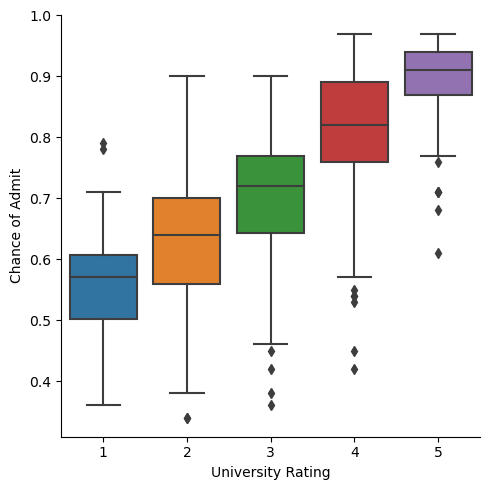

In [29]:
sns.catplot(x='University Rating',y='Chance of Admit',data=student_df,kind='box')

## Step 4: applying multi linear regression model

In [100]:
x = student_df[['Research','CGPA','LOR ','SOP','TOEFL Score','GRE Score']].values
y = student_df[['Chance of Admit']].values
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [101]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [103]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 0.003582548729664702
MAE: 0.04455091064103883
RMSE: 0.059854396076351
r2_score: 0.7653195708101496


In [108]:
#If there is big difference so there is fitting problem
print(r2_score(y_pred,y_test))              #Testing data accuraccy
print(regressor.score(x_test,y_test))       #Training model accuracy 3la data mashafhash
print(mean_squared_error(y_pred,y_test))

0.7653195708101496
0.8115181132357098
0.003582548729664702
